In [60]:
import pandas as pd
import numpy as np

In [61]:
data = pd.read_csv(r'C:\programs\python\.ipynb_checkpoints\DatScience_course\Assignment2\tips (data for regression problem).csv')

In [62]:
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [63]:
IQ1 = data['total_bill'].quantile(0.25)
IQ3 = data['total_bill'].quantile(0.75)
IQR = IQ3 - IQ1
lower_bound = IQ1 - 1.5*IQR
upper_bound = IQ3 + 1.5*IQR
outliers = data[(data['total_bill'] < lower_bound) | (data['total_bill'] > upper_bound)]
data = data[(data['total_bill'] > lower_bound) & (data['total_bill'] < upper_bound)]

In [64]:
data.shape

(235, 7)

In [66]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Encode categorical columns
categorical_columns = ['sex', 'smoker', 'day', 'time']
for column in categorical_columns:
    data[column] = label_encoder.fit_transform(data[column])

# Display the first few rows of the encoded dataframe
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,2,0,2
1,10.34,1.66,1,0,2,0,3
2,21.01,3.50,1,0,2,0,3
3,23.68,3.31,1,0,2,0,2
4,24.59,3.61,0,0,2,0,4


In [67]:
y = data['tip']
y = y.values.reshape(-1,1)
x = data.drop('tip', axis=1)

In [68]:
from sklearn.model_selection import train_test_split

In [69]:
y_train, y_test, x_train, x_test = train_test_split(y, x, test_size=0.2, random_state=42)

In [70]:
from sklearn.linear_model import LinearRegression

In [71]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [72]:
model.score(x_test, y_test)

0.37094686616235895

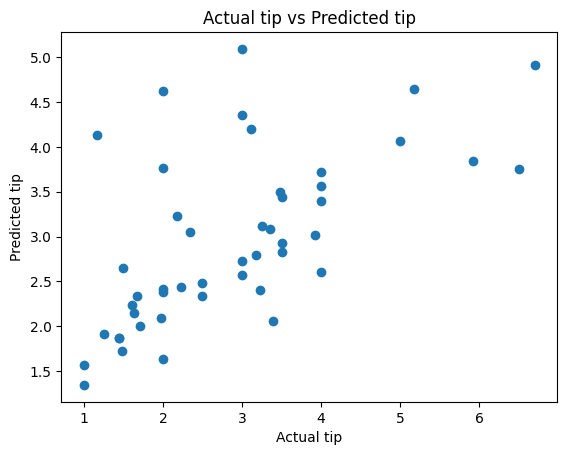

In [74]:
plt.scatter(y_test, model.predict(x_test))
plt.xlabel('Actual tip')
plt.ylabel('Predicted tip')
plt.title('Actual tip vs Predicted tip')
plt.show()

In [75]:
new_data = data

In [76]:
new_data['total_bill'] = np.log(new_data['total_bill'])

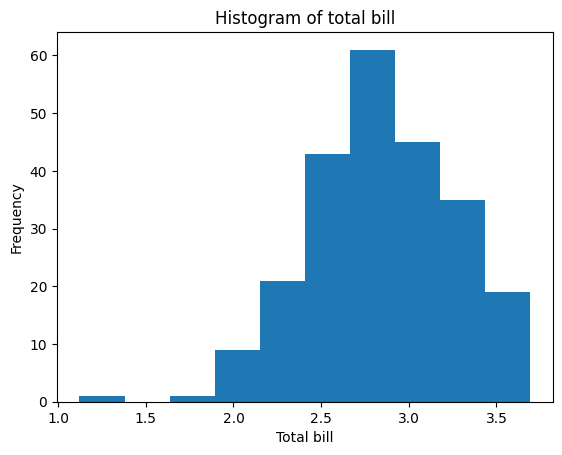

In [77]:
plt.hist(new_data['total_bill'])
plt.xlabel('Total bill')
plt.ylabel('Frequency')
plt.title('Histogram of total bill')
plt.show()

In [78]:
y = new_data['tip']
y = y.values.reshape(-1,1)
x = new_data.drop('tip', axis=1)

In [79]:
y_train, y_test, x_train, x_test = train_test_split(y, x, test_size=0.2, random_state=42)

In [80]:
new_model = LinearRegression()
new_model.fit(x_train, y_train)

LinearRegression()

In [81]:
new_model.score(x_test, y_test)

0.38761053305215376

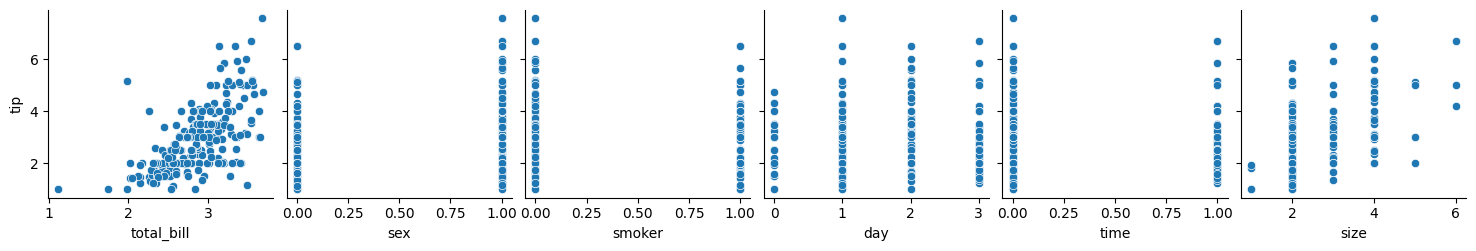

In [83]:
import seaborn as sns

# Create a pair plot for every feature with the 'tip' column
sns.pairplot(data, y_vars='tip', x_vars=data.columns.drop('tip'))
plt.show()